In [237]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

train_df = pd.read_csv('../data/titanic_train.csv')
test_df = pd.read_csv('../data/titanic_test.csv')

In [238]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [239]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [240]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

In [241]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [242]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

In [243]:
print(train_df.groupby('Pclass').mean())

        Survived        Age       Fare
Pclass                                
1       0.629630  38.233441  84.154687
2       0.472826  29.877630  20.662183
3       0.242363  25.140620  13.675550


In [244]:
def insert_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 38
        else:
            return 25
    else:
        return age

In [245]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(insert_age, axis=1)
train_df['Age'].median()

26.0

In [246]:
test_df['Age'] = test_df[['Age', 'Pclass']].apply(insert_age, axis=1)
test_df['Age'].median()

25.0

In [247]:
fare_median_train = train_df['Fare'].median()
train_df['Fare'].fillna(fare_median_train, inplace=True)
embarked_top_train = train_df['Embarked'].value_counts()[0]
train_df['Embarked'].fillna(embarked_top_train, inplace=True)

In [248]:
fare_median_test = test_df['Fare'].median()
test_df['Fare'].fillna(fare_median_test, inplace=True)
embarked_top_test = test_df['Embarked'].value_counts()[0]
test_df['Embarked'].fillna(embarked_top_test, inplace=True)

In [249]:
train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [250]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [251]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [252]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 16.5+ KB


In [253]:
sex_train = pd.get_dummies(train_df['Sex'], drop_first=True)
sex_train

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [254]:
sex_test = pd.get_dummies(test_df['Sex'], drop_first=True)
print(sex_test)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]


In [255]:
embark_train = pd.get_dummies(train_df['Embarked'], drop_first=True)
print(embark_train)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [256]:
embark_test = pd.get_dummies(test_df['Embarked'], drop_first=True)
print(embark_test)

     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]


In [257]:
train_df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
test_df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [258]:
train_df = pd.concat([train_df, sex_train, embark_train], axis = 1)

train_df.head()

,Survived,Pclass,Age,Fare,male,C,Q,S
0,0,3,22.0,7.2500,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,0,0,0,1
4,0,3,35.0,8.0500,1,0,0,1


In [259]:
test_df = pd.concat([test_df, sex_test, embark_test], axis = 1)

test_df.head()

,Pclass,Age,Fare,male,Q,S
0,3,34.5,7.8292,1,1,0
1,3,47.0,7.0000,0,0,1
2,2,62.0,9.6875,1,1,0
3,3,27.0,8.6625,1,0,1
4,3,22.0,12.2875,0,0,1


In [260]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   male      891 non-null    uint8  
 5   C         891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 31.4 KB


In [261]:
test_df.info()
X_test = test_df.drop('S',axis=1).values
y_test = test_df['S'].values
X_train = train_df.drop('Survived',axis=1).values
y_train = train_df['Survived'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   Fare    418 non-null    float64
 3   male    418 non-null    uint8  
 4   Q       418 non-null    uint8  
 5   S       418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 11.1 KB


In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [263]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1000, solver='lbfgs')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

In [267]:
# y_predict_train = classifier.predict(X_train)
y_predict_test = classifier.predict(X_test)

<AxesSubplot:>

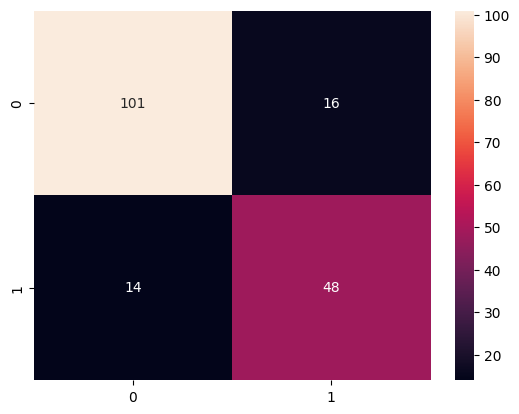

In [270]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [272]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [282]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'male', 'C', 'Q', 'S'], dtype='object')

In [280]:
exemplo = np.array([0,25,350,1,0,0,1]).reshape((1, -1))

classifier.predict(exemplo)[0]

1